# Customer Segmentation - K-Means Clustering

## 1. Project Background

The aim of this project was to identify different personality types within a company’s (dummy) 
customer data set. Understanding personality types within a company’s customer base, allows them to 
tailor their product offering, marketing campaigns and customer service activity to specifically meet 
their customer’s needs and behaviours. Ultimately, enabling them to maximise their ROI as they build 
loyalty. 

A K-Means clustering algorithm was applied to the dataset to identify 4 core clusters making up the 
customer base. 

## 2. Literacture Review

### Machine Learning & Data Mining

Literature states that machine learning is categorised into 2 types, supervised and unsupervised learning (Kouhalvandi et al, 2020; Akmal, 2020). According to Pradana and Ha (2021) supervised learning is used to solve problems like classification and regression, where there is a target label to predict the future. Unsupervised learning does not always have targets to predict, for example, clustering is based on its mathematical model (Hidayat et al, 2018). 

“By means of the internet and database technologies, huge amounts of data about markets and customers has now become available to be exploited and this enables researchers and practitioners to make use of sophisticated data analysis techniques apart from the traditional multivariate statistical tools. These sophisticated techniques are a family of either data mining or machine learning research.” (Hiziroglu, 2013). 

Kansal et al (2019) says that today, businesses run on the basis of such innovation that they have the ability to captivate their customers with products, but they can sometimes be at such large volumes that customers can become overwhelmed. They also say that customers can become confused on what to buy and so companies become nonplussed about what section of customers to target their products (Kansal et al, 2019). Machine learning helps with this as applying various algorithms helps unravel the hidden patterns in the data for better decision making (Kansal et al, 2019). 

### Market Segmentation

“In this era, increasing the level of consumer consumption is very reasonable, this is based on the very fast development of production. This makes each person feel like they have an obligation to spend something to enjoy these developments” (Pradana and Ha, 2021). Calvo-Porral and Lévy -Mangin (2018) state that Increasing the number and variance of products is not a bad thing for the market, but when increasing customers, it’s important to tailor the strategy to not waste resources targeting the wrong customer. 

Nairn & Berthon (2003) define a market segment as “a set of customers who have similar characteristics of demography, behaviours, values and so on”. 

### K-Means Clustering

The goal of K-Means is to group data into non-overlapping sub-groups that are distinct from each other. That means each sub-group/cluster will consist of features that distinguish them from other clusters (Selvaraj, 2021). 

The selection of segmentation techniques has become more important due to developments in information and communication technologies, especially database management systems and data mining have changed the way of marketing (Hiziroglu, 2013). The vast availability of data and the inefficient performance of traditional statistical techniques on such voluminous data have stimulated researchers to find effective segmentation tools in order to discover useful information about their markets (Hiziroglu, 2013). Thus, knowledge discovery and data mining have been seen as a solution to this problem (Hiziroglu, 2013).

Unlike other approaches, K-Means is simple to implement. A study conducted by Firdaus and Uddin (2015) found K-Means to be the most frequently used customer segmentation method for this reason. Gomes and Meisen (2023) recommend K-Means as the best approach for retail data such as this. 

## 3. Data

The data used for this project was sourced from Kaggle. 

Link to dataset: <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis" target="_blank">https://www.kaggle.com/datasets/imakash3011/customer-personaility-analysis</a>

### Data Features

The data is divided into 4 categories:

<strong>1. Customer Information</strong>
* ID : Customer’s unique identifier
* Year_Birth : Customer’s year of birth 
* Education : Customer’s level of education
* Marital_Status : Customer’s marital status
* Income : Customer’s annual household income
* Kidhome : Number of children within the customer’s household
* Teenhome : Number of teens within the customer’s household
* Recency : Number of days since the customer’s last purchase
* Complain : If the customer complained within the last 2 years; 1 = yes, 0 = no

<strong>2. Shopping Habits</strong>
* MntWines : Amount spent on wine in the last 2 years
* MntFruits : Amount spent on fruit in the last 2 years
* MntMeatProducts : Amount spent on meat in the last 2 years
* MntFishProducts : Amount spent on fish in the last 2 years
* MntSweetProducts : Amount spent on sweets in the last 2 years
* MntGoldProds : Amount spent on gold in the last 2 

<strong>3. Promotional Interaction</strong>
* NumDealsPurchases : Number of purchases made with discount applied
* AcceptedCmp1 : If the customer accepted the offer in the 1st campaign; 1 = yes, 0 = no
* AcceptedCmp2 : If the customer accepted the offer in the 2nd campaign; 1 = yes, 0 = no
* AcceptedCmp3 : If the customer accepted the offer in the 3rd campaign; 1 = yes, 0 = no
* AcceptedCmp4 : If the customer accepted the offer in the 4th campaign; 1 = yes, 0 = no
* AcceptedCmp5 : If the customer accepted the offer in the 5th campaign; 1 = yes, 0 = no
* Response : If the customer accepted the offer in the last campaign; 1 = yes, 0 = no

<strong>4. Buying Method</strong>
* NumWebPurchases : Number of purchases the customer has made via the website
* NumCatalogPurchases : Number of purchases the customer has made via the catalogue
* NumStorePurchases : Number of purchases the customer has made via the store
* NumWebVisitsMonth : Number of time the customer has visited the website in the last month

### ETL Pipeline

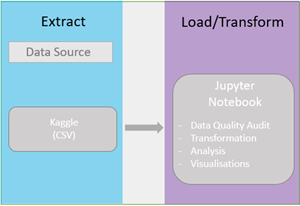

## 4. Transformation

Once the dataset was downloaded from Kaggle in the form of a CSV, I loaded it into Jupyter Notebook to enable me to use Python code to for the machine learning. I therefore started by importing the various libraries I needed throughout the project: 

In [12]:
data = pd.read_csv(r"C:\\Users\\Uni\Documents\Customer Segmentation\Dat Set.csv")

In [6]:
#import modules
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

I began the transformation of the data to ensure my model wasn’t impacted by any bad data. This started with a data quality audit. “Performing data quality audits is crucial for maintaining high-quality datasets, which in turn drive better decision-making and success” (Warsame, 2023). Battson (2019) explains that poor quality data may mean that any marketing campaign derived from the findings of this project may be ineffective and could even lead to being unlawful in terms of data protection.

The data quality audit was conducted in accordance with the Government Data Quality Hub (2021) 6 data quality dimensions. There was particular attention paid to the ‘Completeness’, ‘Accuracy’ and ‘Validity’, as issues in these areas can have a significant impact on the model’s performance. 

In [14]:
#Null values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [16]:
data = data.dropna()

Null values were identified and removed from the dataset, these only existed within the ‘income’ field of the data set. 

In [17]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

The data is now complete. 

I then checked for duplicate rows within the data set: 

In [18]:
data.duplicated().sum()

0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

We can see that the ‘DT_Customer’ is being classified incorrectly as ‘Object’ rather than ‘DateTime’ and so this was corrected: 

In [20]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

This would be a good point to address any privacy considerations that need to be applied, for example, anonymising and any other requirement to be compliant with data privacy laws. As this is a dummy dataset, and the purpose of this exercise is primarily for learning/practice, this is not a factor to consider within this particular project. 

There were a few columns within the dataset that could be combined/adjusted to produce more informative and simpler variables, these were therefore transformed to new variables. ‘Year_Birth’ was used to calculate the customers’ ‘Age’: 

In [24]:
data['Age'] = 2023 - data['Year_Birth']

A total ‘Spent’ column was created by calculating the total spent across all of the product categories. The individual product categories were kept within the dataset as it would be interesting to learn if spend within individual categories differs between customer demographics: 

In [25]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

There were a lot of categories included in the ‘Marital_Status’ column, way more information that’s needed for this purpose and so the values were simplified to whether the customer was ‘Living_With’ a partner or alone: 

In [26]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

A column was created to combine ‘Kidhome’ and ‘Teenhome’ to tell us the total number of children living within the household. Again, it would be interesting to understand if there are any differences between the customer having younger or teen children and their spend on products and so the individual variables were kept within the dataset: 

In [27]:
data['Children'] = data['Kidhome'] + data['Teenhome']

Another column was created to establish total family size, including any partners in the household as well as total children, the sum of these values formed ‘Family_Size’. The individual variables were again kept to understand any differences within the model:

In [28]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

By using the values within the newly created ‘Children’ column, we can deduce whether the customer is a parent or not. While the above elements of transformation aim to understand any different in shopping habits between the age and volume of children within the household. This new value was created in a separate column to enable differences to be identified between adults with and without children: 

In [29]:
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

Similarly to ‘Martial_Status’, ‘Education’ has a lot of categorical values, too many than needed for this model. The values were condensed to provide 3 groups of education: 

In [30]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

Dropping the unnecessary columns concluded the reorganisation of the dataset: 

In [31]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

The next step was to conduct some exploratory data analysis (EDA) to understand any initial patterns emerging from the data. Demographics were visualised against amount spent to see if there were any initial trends. Another thing to consider during the EDA process was machine learning bias which Gillis (2023) tells us that “Faulty, poor or incomplete data results in inaccurate predictions”. They also tell us that awareness and governance are key to avoiding machine learning bias. While this is a dummy data set and I had no control over representation within the dataset (prejudice bias), visualising the data will show me the shapes and make-up of what will form the outcome. 

This EDA process also allowed me to identify anything that the data quality audit may have missed. Visualising the data prior to applying the algorithm helped me to understand any further adjustments that needed to be applied to the data: 

In [35]:
data.shape

(2216, 29)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [40]:
data.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2216.000000        2216.000000      2216.000000          2216.000000   
mean      43.965253           2.323556         4.085289             2.671029   
std       51.815414           1.923716         2.740951             2.926734   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.500000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      321.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000   

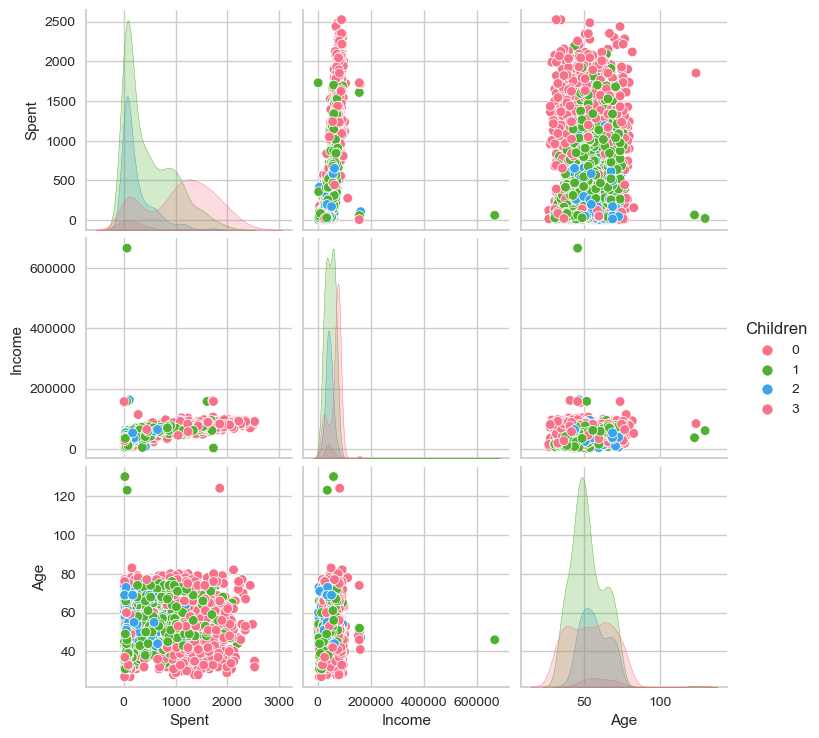

In [42]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

The pair plot helped me to understand the relationships within the variables and what may form the most separated clusters. The ‘hue’ within the visualisation shows the positioning within the variables in regards to the amount of children in the household. As you can see, there are some interesting patterns occurring. Those with 3 children tend to spend the most when shopping, as well as being more likely to have a larger income. 

I then used some scatterplots to take a closer look at some of the relationships between the variables: 

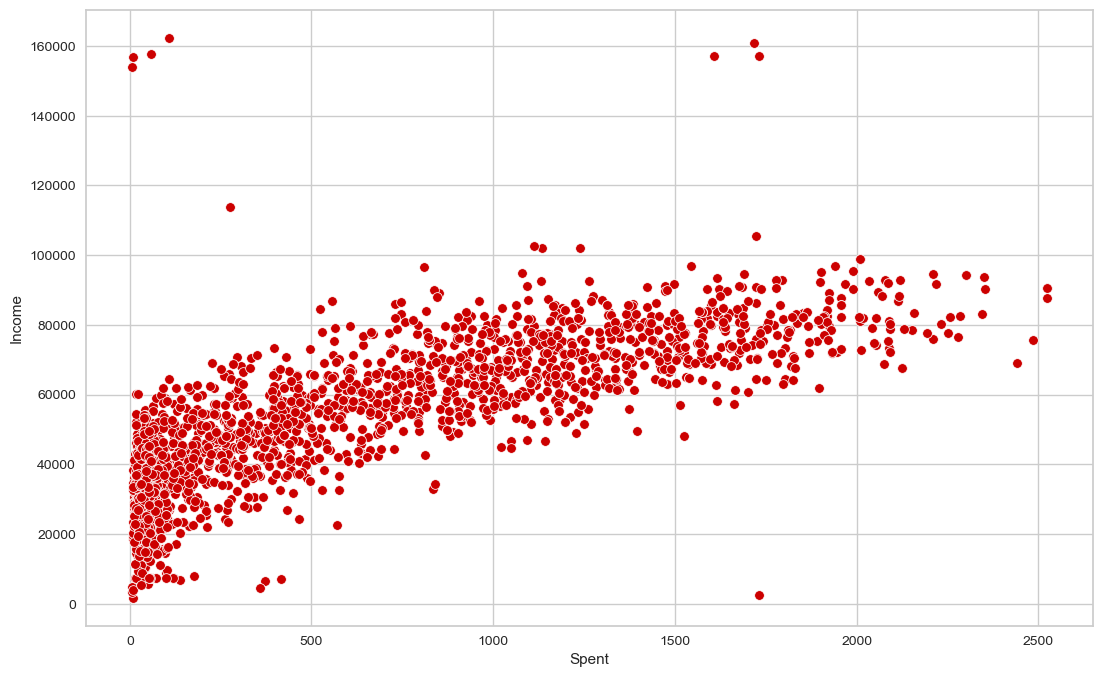

In [43]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

The above shows the relationship between the ‘Income’ and ‘Spent’ variables. There looks to be an upward trend, with those on a higher income generally spending more. There also looks to be some potential outliers – we’ll look into this further a little later on. 

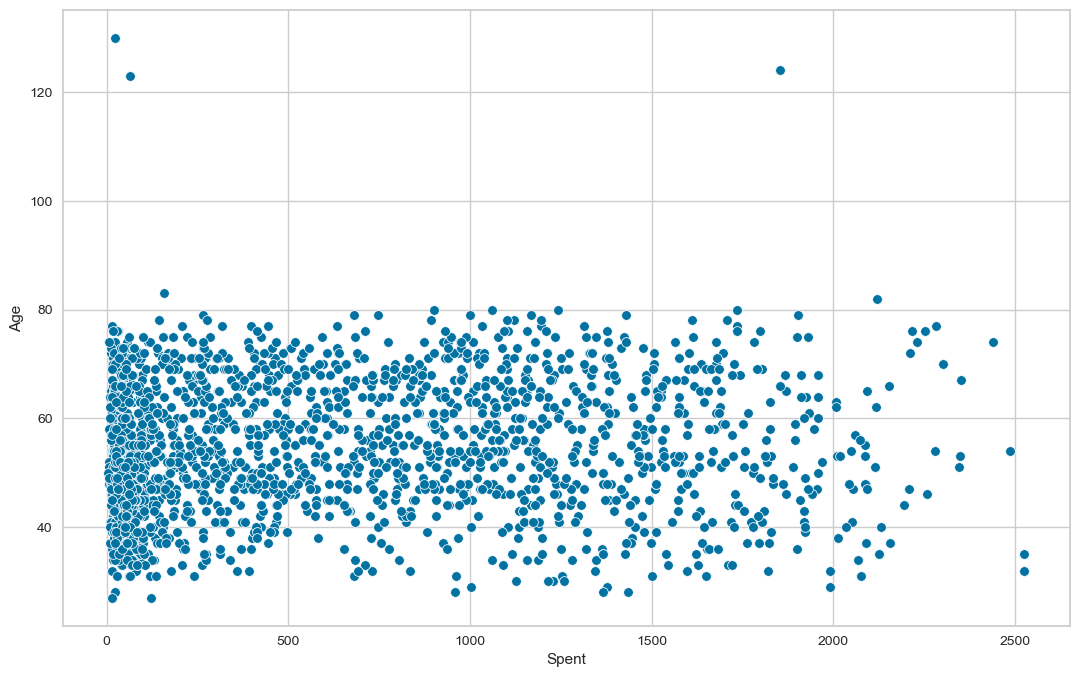

In [44]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);

The ‘Age’ and ‘Spent’ graph didn’t show any obvious relationships but again, highlighted some potential outliers. 

I used a histogram showed me the customer’s education levels in relation to volume and amount spent: 

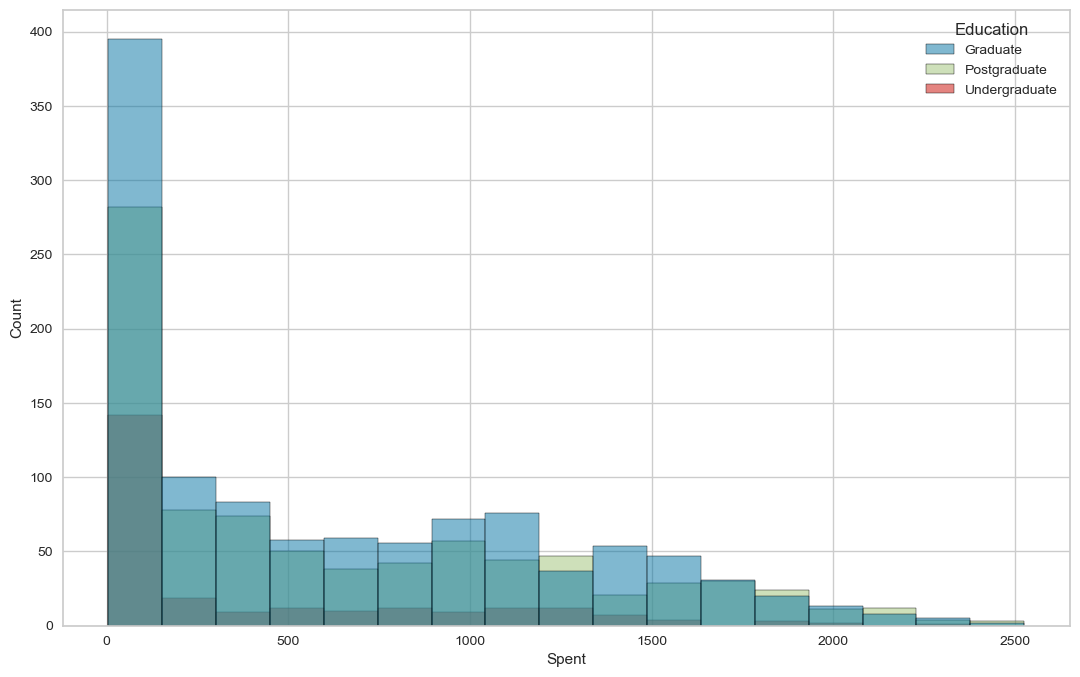

In [45]:
plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);

You can see that the customers are mostly made up of ‘Graduates’ and while they are still present towards the larger end of the ‘Spend’, ‘Postgraduates’ are also more likely to spend more. 

Back to the outliers. Franklin, (2019) talks about K-Means Clustering’s sensitivity to outliers and how they can impact the efficiency of the clusters. It’s therefore important to remove them prior to the analysis taking place. A boxplot was used in the identification process: 

In [50]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()

In [52]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

In [53]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [54]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    123
239    130
339    124
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



The outliers were then removed: 

In [55]:
data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [56]:
data.shape

(2212, 29)

The next step in transforming the data was to identify categorical values and encode them into numerical values. Roy (2019) says that “Most of the Machine learning algorithms cannot handle categorical variables unless we convert them to numerical values”. The categorical variables were ‘Education’ and ‘Living_With’. 

In [58]:
categorical = [var for var in data.columns if data[var].dtype=='O']

I then encoded the variables: 

In [61]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [62]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})

As the values within ‘Education’ had a clear order, they were coded with ordinal numbers to represent the increasing level of education. 

As all of the values were numerical, I could now apply correlation analysis to see which of the variables are the most correlated, although this isn’t necessarily important for the algorithm since K-Means doesn’t rely on linear relationships: 

<Axes: >

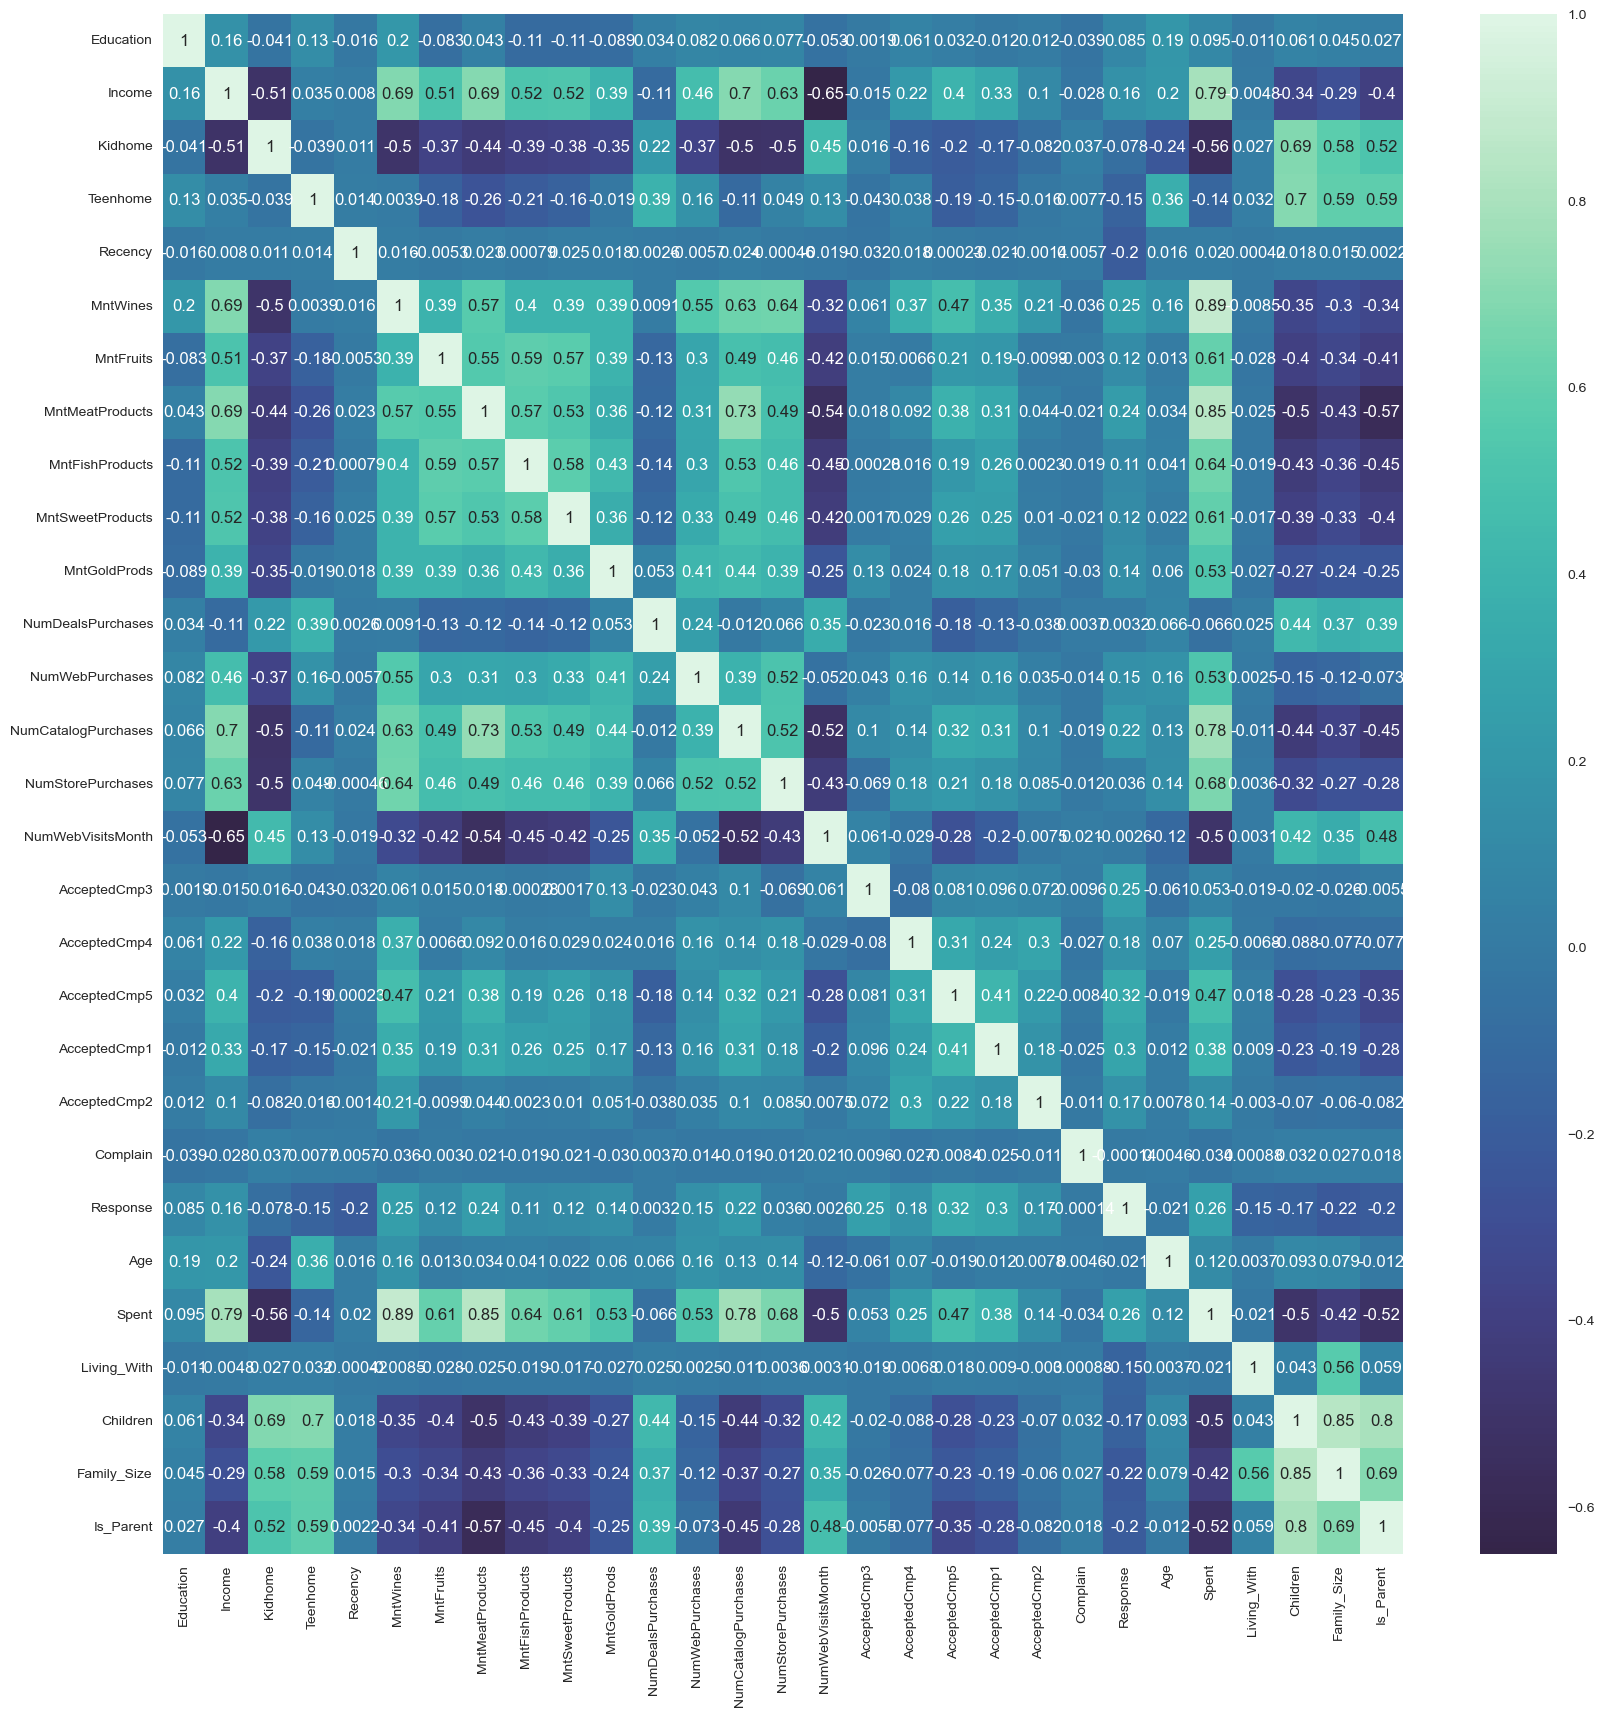

In [65]:
corrmat = data.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

Next, I needed to standardise the data. Dabbura (2018) tells us that “since clustering algorithms, including k-means, use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one”. The StandardScaler was applied: 

In [68]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [69]:
data.head(5)

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3  -0.411675 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4   1.123949  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.690293         2.453472          1.483713      0.852576   
1        -0.718230        -0.651004         -0.634019     -0.733642   
2        -0.178542         1.339513         -0.147184     -0.037254   
3        -0.655787        -0.504911         -0.585335     -0.752987   
4        -0.218684         0.152508         -0.001133     -0.559545   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.351030         1.426865             2.503607          -0.555814   
1          -0.168701        -1.126420            -0.571340          -1.171160   
2          -0.688432         1.426865            -0.229679           1.290224   
3          -0.168701        -0.761665            -0.913000          -0.555814   
4           1.390492         0.332600             0.111982           0.059532   

   NumWebVisitsMonth       Age     Spent  Living_With  Children  Family_Size  \
0           0.692181  1.018352  1.676245    -1.349603 -1.264598    -1.758359   
1          -0.132545  1.274785 -0.963297    -1.349603  1.404572     0.449070   
2          -0.544908  0.334530  0.280110     0.740959 -1.264598    -0.654644   
3           0.279818 -1.289547 -0.920135     0.740959  0.069987     0.449070   
4          -0.132545 -1.033114 -0.307562     0.740959  0.069987     0.449070   

   Is_Parent  
0  -1.581139  
1   0.632456  
2  -1.581139  
3   0.632456  
4   0.632456

The final step of transformation was to apply dimensionality reduction. Yiu (2019) tells us that having a large number of features (demographics) to observations (spend), we can risk overfitting the model; negatively impacting the models performance. In order to avoid the ‘Curse of Dimensionality’, dimensionality reduction was performed: 

In [70]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [71]:
W = p.components_.T
W

array([[ 1.13473006e-02,  1.40725381e-01, -5.06789789e-01],
       [ 2.79487087e-01,  1.78234953e-01, -7.54072922e-02],
       [-2.46222755e-01,  5.22543557e-03,  2.82874637e-01],
       [-9.87087868e-02,  4.62105115e-01, -1.51584659e-01],
       [ 3.52658505e-03,  1.62542199e-02,  3.58517429e-02],
       [ 2.55717059e-01,  2.09381315e-01, -1.16818214e-01],
       [ 2.38397785e-01,  1.10671151e-02,  2.54419297e-01],
       [ 2.85462070e-01,  9.92037407e-03,  7.64467245e-02],
       [ 2.48709932e-01,  2.14452764e-04,  2.53397157e-01],
       [ 2.37301739e-01,  2.16583034e-02,  2.58004407e-01],
       [ 1.88380375e-01,  1.23091615e-01,  1.99550746e-01],
       [-7.82601318e-02,  3.48740286e-01,  1.52604042e-01],
       [ 1.67559847e-01,  2.96778507e-01,  2.28045316e-02],
       [ 2.77349185e-01,  1.05959583e-01,  1.67759204e-02],
       [ 2.41542804e-01,  2.05472447e-01, -7.37972912e-03],
       [-2.25949453e-01,  4.61020188e-02,  9.10330871e-02],
       [ 3.84646804e-02,  2.34785983e-01

In [72]:
pd.DataFrame(W, index=data.columns, columns=['W1','W2','W3'])

W1        W2        W3
Education            0.011347  0.140725 -0.506790
Income               0.279487  0.178235 -0.075407
Kidhome             -0.246223  0.005225  0.282875
Teenhome            -0.098709  0.462105 -0.151585
Recency              0.003527  0.016254  0.035852
MntWines             0.255717  0.209381 -0.116818
MntFruits            0.238398  0.011067  0.254419
MntMeatProducts      0.285462  0.009920  0.076447
MntFishProducts      0.248710  0.000214  0.253397
MntSweetProducts     0.237302  0.021658  0.258004
MntGoldProds         0.188380  0.123092  0.199551
NumDealsPurchases   -0.078260  0.348740  0.152604
NumWebPurchases      0.167560  0.296779  0.022805
NumCatalogPurchases  0.277349  0.105960  0.016776
NumStorePurchases    0.241543  0.205472 -0.007380
NumWebVisitsMonth   -0.225949  0.046102  0.091033
Age                  0.038465  0.234786 -0.428640
Spent                0.320099  0.133707  0.037590
Living_With         -0.027576  0.125510  0.300403
Children            -0.248087  0.339319  0.092587
Family_Size         -0.219730  0.346883  0.235168
Is_Parent           -0.242808  0.292276  0.081763

In [73]:
p.explained_variance_

array([8.27465625, 2.92091447, 1.43060466])

In [74]:
p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.06499809])

In [75]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

Explained Variability
1               0.375951
2               0.132709
3               0.064998

In [76]:
p.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.57365761])

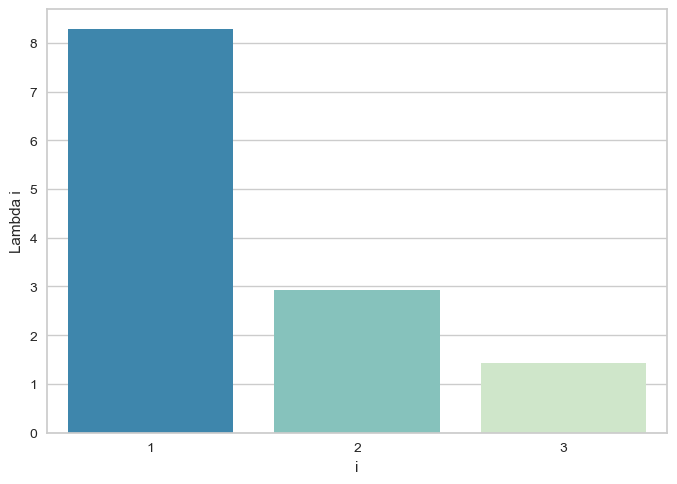

In [77]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [78]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))

In [79]:
data_PCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -5.139550e-17  2.876570 -5.915031 -2.548037 -0.784933  2.418554   
col2  2212.0  1.284887e-17  1.709068 -4.398446 -1.343425 -0.133321  1.243053   
col3  2212.0 -3.212219e-18  1.196080 -3.542527 -0.864761 -0.015857  0.824000   

           max  
col1  7.441146  
col2  6.248176  
col3  5.036812

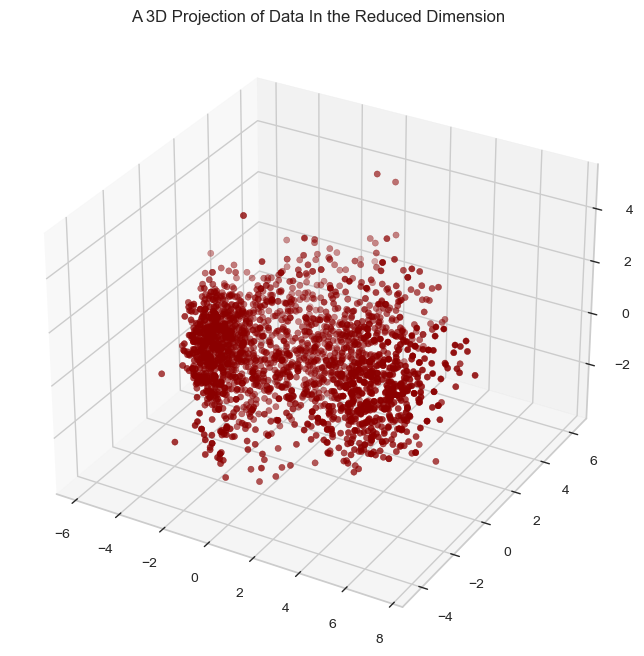

In [80]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

## Analysis

Prior to the K-Means algorithm being applied, I first needed to identify ‘k’; the number of centroids/clusters applied. Saji (2023) talks about how the elbow method is a good way to determine the optimum value of k. They say that by varying the number of clusters from 1-10, we can calculate the ‘Within-Cluster Sum of Square’ which is the distance the centroids are from each point. The elbow plot was applied: 

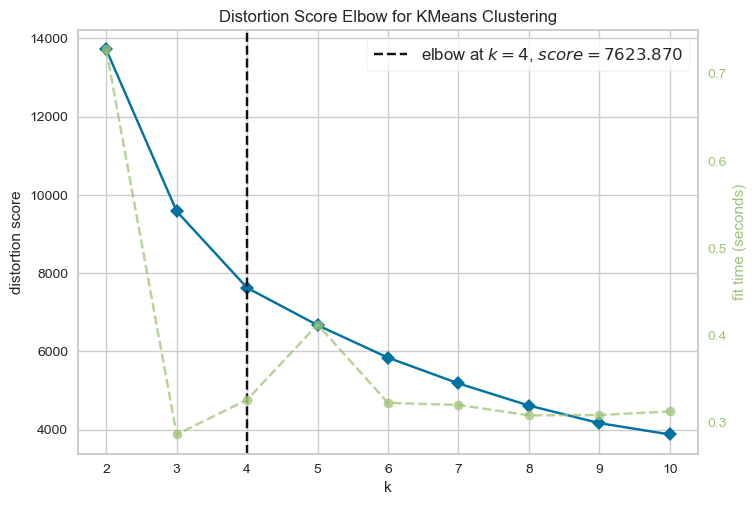

In [81]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show();

We can see that the line dramatically changes at K4 and so this is the number of clusters to be applied. 

Clustering wasthen applied, along with a 3D scatterplot to view the make up of clusters: 

In [85]:
AC = AgglomerativeClustering(n_clusters=4)

In [86]:
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC

In [87]:
data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC

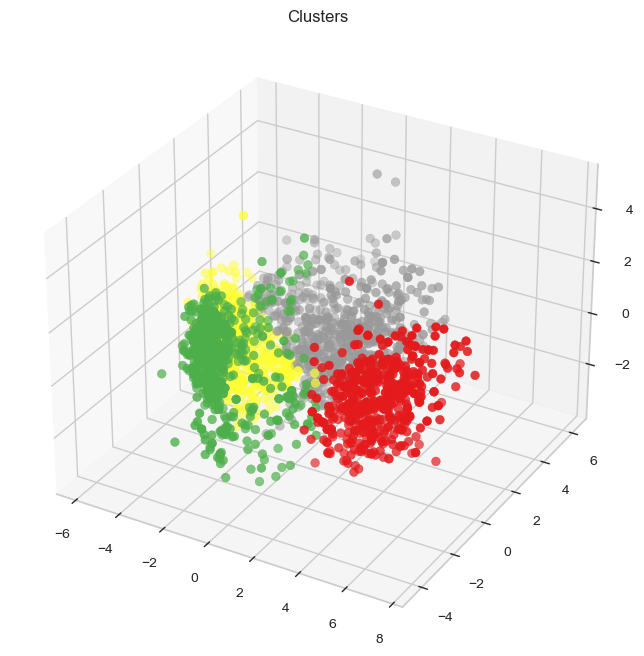

In [88]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

A bar chart was also applied to show the quantity of customers making up each cluster: 

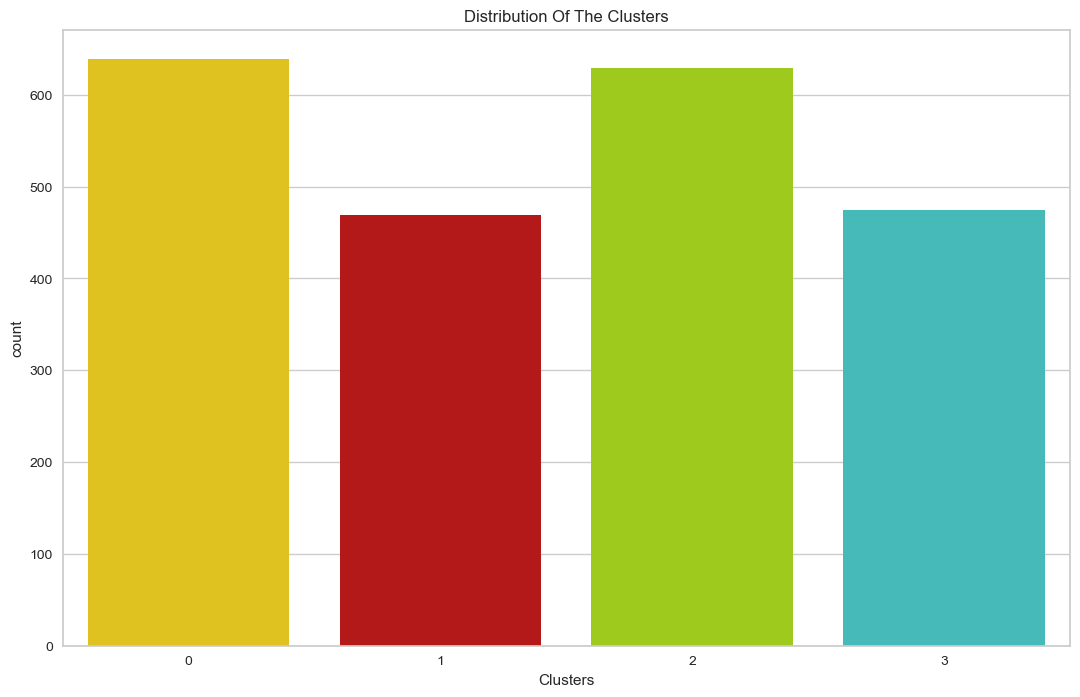

In [89]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

We can see that each cluster contains 450-850 customers, a good distribution across the 4. Next, I began applying visualisations to the variables in relation to each of the clusters. This meant I was able to understand the customer profiling that makes up each cluster: 

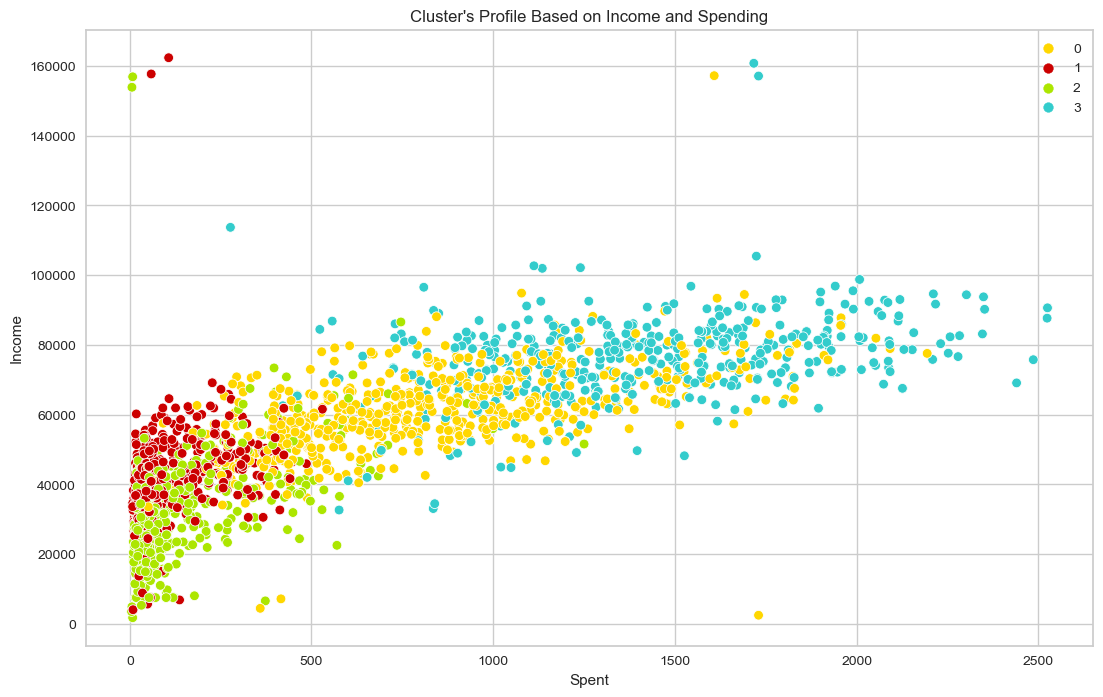

In [90]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

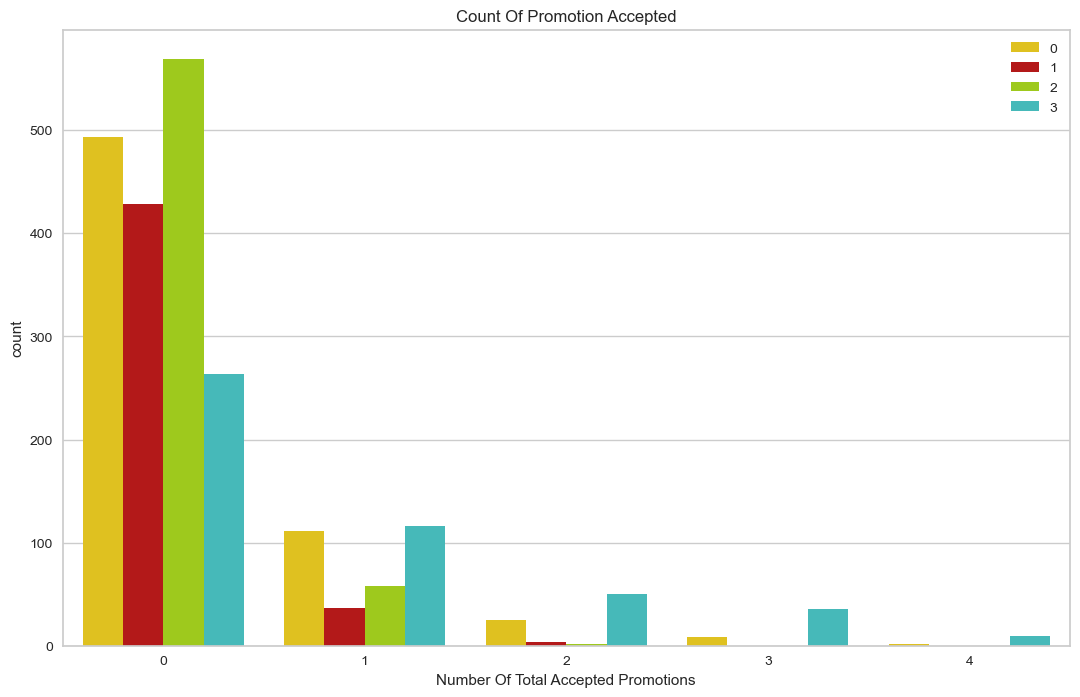

In [92]:
data_old['Total_Promos'] = data_old['AcceptedCmp1']+ data_old['AcceptedCmp2']+ data_old['AcceptedCmp3']+ data_old['AcceptedCmp4']+ data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

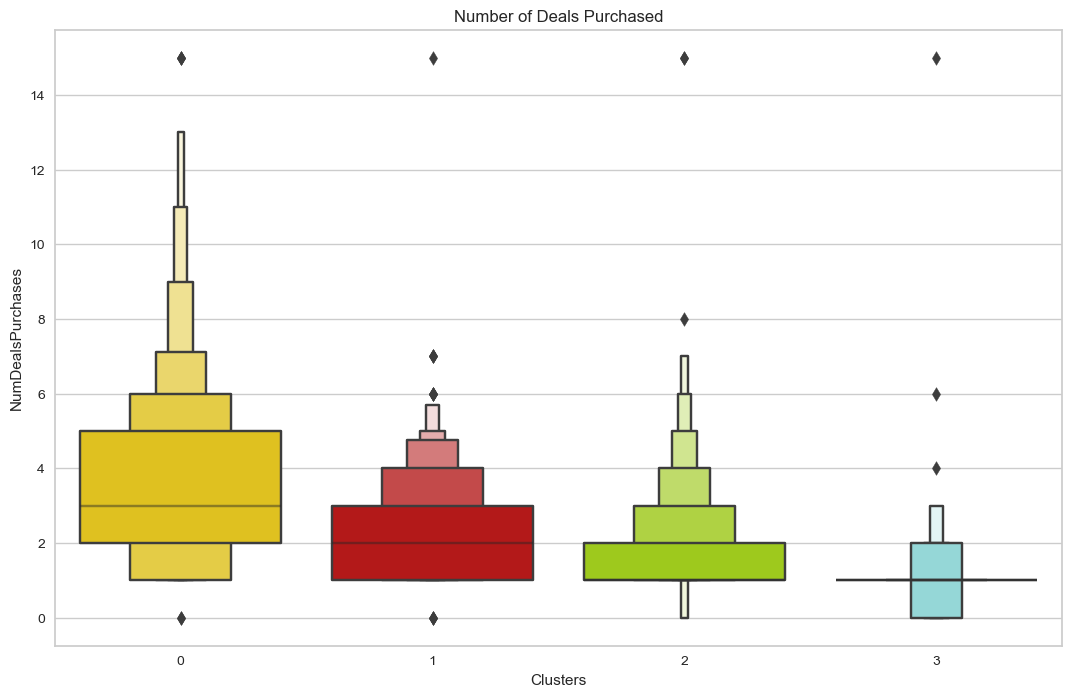

In [93]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data_old['NumDealsPurchases'],x=data_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');

<Figure size 1300x800 with 0 Axes>

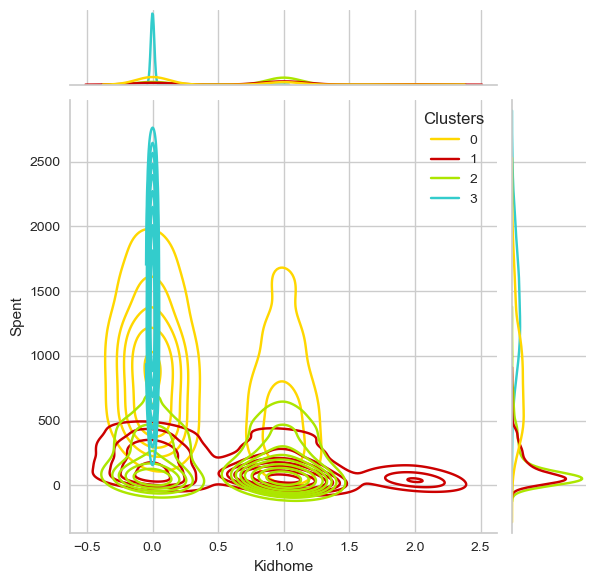

<Figure size 1300x800 with 0 Axes>

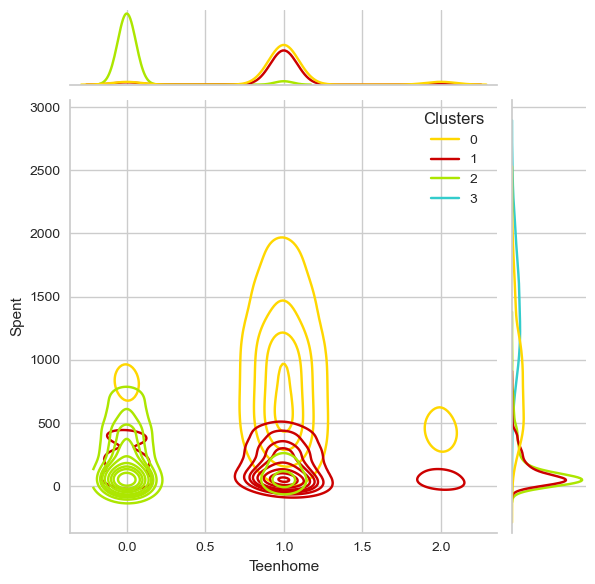

<Figure size 1300x800 with 0 Axes>

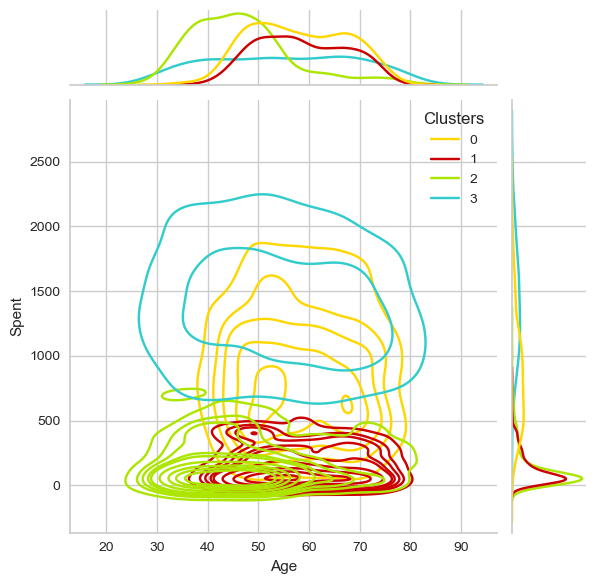

<Figure size 1300x800 with 0 Axes>

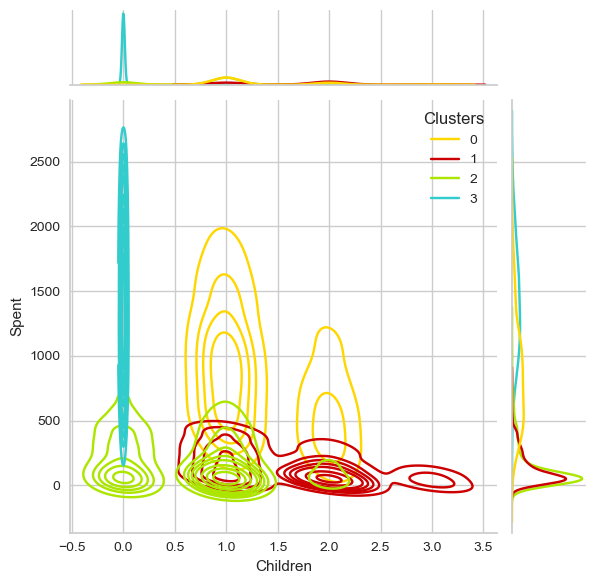

<Figure size 1300x800 with 0 Axes>

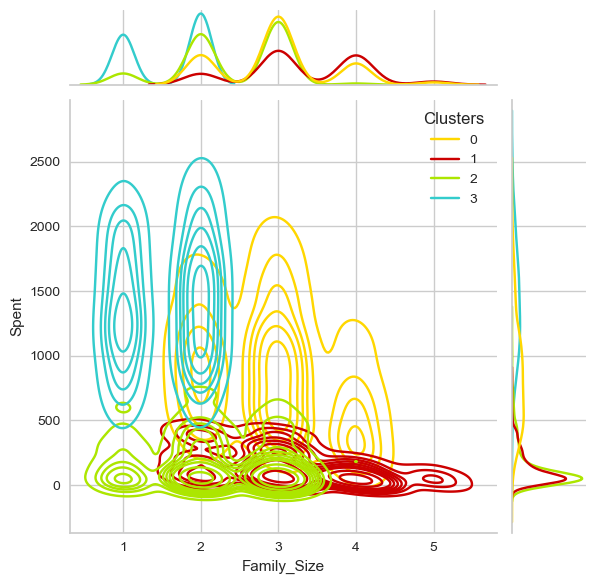

<Figure size 1300x800 with 0 Axes>

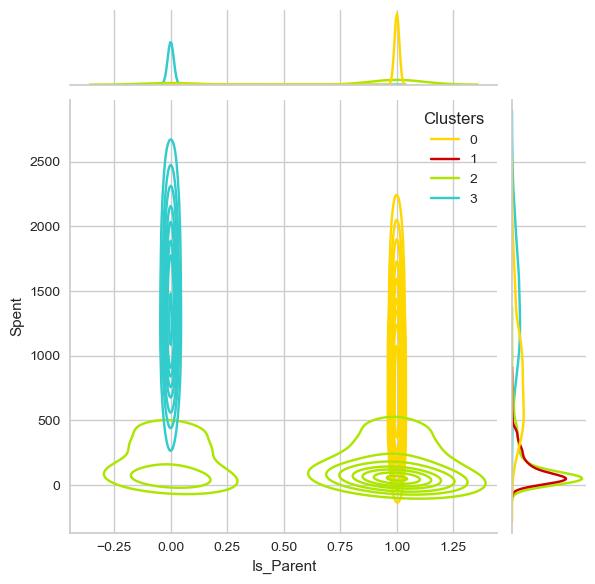

<Figure size 1300x800 with 0 Axes>

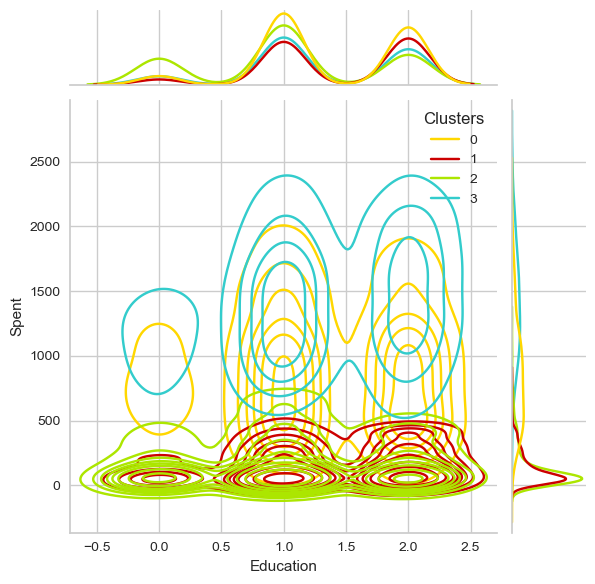

<Figure size 1300x800 with 0 Axes>

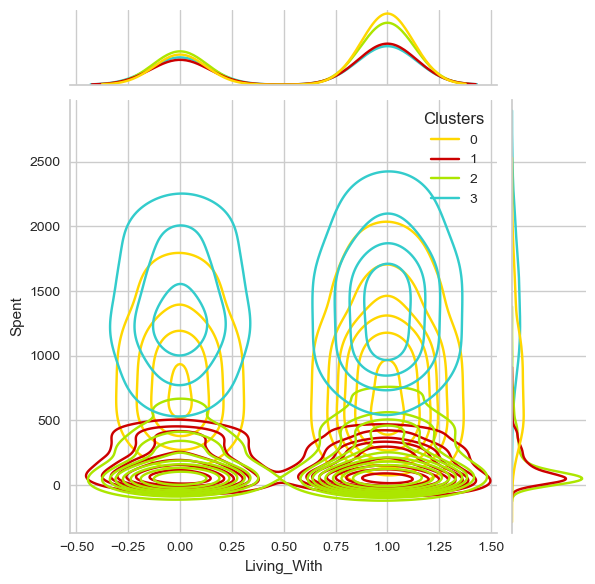

In [94]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data_old[i], y=data_old['Spent'], hue=data_old['Clusters'], kind='kde', palette=pal);

## 6. Results - Segmentation

The cluster results are shown in the below table: 

|---------|-------------------------------------------------------|
|Cluster  |Personality Types                                      |
|---------|-------------------------------------------------------|
|Cluster 0| - Generally spent £500 - £1000 in last 2 year         | 
|         | - On average purchased 3 deals in last 2 years        |
|         | - All parents and have 1-2 under 18s in household     |
|         | - None are single                                     |
|         | - Graduates and Postgraduates                         |
|---------|-------------------------------------------------------|   
|Cluster 1| - Generally spent £0 - £500 in last 2 years           |
|         | - On average purchased 2 deals in last 2 years        |
|         | - All parents and have up to 3 under 18s in household | 
|         | - None are single                                     |
|         | - They vary in education                              |
|---------|-------------------------------------------------------|
|Cluster 2| - Generally spent £500 - £1000 in last 2 years        |
|         | - On average purchased 2 deals in last 2 years        |
|         | - Generally have 0-1 under 18s in household           |
|         | - More likely to have a partner but some are single   |
|         | - They vary in education                              |
|---------|-------------------------------------------------------|
|Cluster 3| - Generally spent £1000 - £2500 in last 2 years       |
|         | - On average purchased 1 deal in last 2 years         |
|         | - These customers are not parents                     |
|         | - Single and partnered customers                      |
|         | - Graduates and Postgraduates                         |
|---------|-------------------------------------------------------|

Equipped with the above, the marketing team can more efficiently plan their campaigns, target their content and ultimately return greater ROI. Cluster 0 is the best cluster to target will deals since they buy the most on average. Family friendly products could be promoted most efficiently to clusters 0 and 1 since they have the most under 18s in their household. They also will know to protect customers in cluster 3 as they spend the most. 

## 7. Recommended Improvements

Reflecting on the project, I understand there to be a few elements that could be incorporated to improve upon in future iterations. 

With more time, and in turn, more skill in Python and data analysis, the dimensionality reduction algorithm could be applied to evaluated to ensure the data is representative of the dataset and the relationships within it. The same could be applied to the elbow method undertaken to establish ‘k’; I could have re-run it several times to see if on any occasion the curve landed on a different amount of customers. 

## 8. References

Agarwal, V. (2019). Outlier detection with Boxplots. [Online]. Medium. Last Updated: 20 November 2019. Available at: https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21 [Accessed 7 September 2023].

Akmal, A,. (2020). Predicting Dropout on E-Learning using Machine Learning. Journal of Applied Data Sciences. 1(1), pp.29-34. [Online]. Available at: https://doi.org/10.47738/jads.v1i1.9 [Accessed 31 July 2023.

Battson, D. (2019). Why data auditing is a necessity. [Online]. Data HQ. Last Updated: 19 February 2019. Available at: https://datahq.co.uk/knowledge-hub/blog/why-data-auditing-is-a-necessity [Accessed 1 August 2023].

Brownlee, J. (2020). 6 Dimensionality Reduction Algorithms With Python. [Online]. Machine Learning Mastery. Last Updated: 17 August 2020. Available at: https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/ [Accessed 10 August 2023].

Calvo-Porral, C. Levy-Mangin, J. (2019). Profiling shopping mall customers during hard times. Journal of Retailing and Consumer Services. 48(x), pp.238-246. [Online]. Available at: https://doi.org/10.1016/j.jretconser.2019.02.023 [Accessed 31 July 2023].

Dabbura, I. (2018). K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks. [Online]. Towards Data Science. Last Updated: 17 September 2018. Available at: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-draw [Accessed 2 July 2023].

Fawcett, A. (2021). Data Science in 5 Minutes: What is One Hot Encoding?. [Online]. Educative. Last Updated: 11 February 2021. Available at: https://www.educative.io/blog/one-hot-encoding [Accessed 14 August 2023].

Franklin, S. (2019). Effect of outliers on K-Means algorithm using Python. [Online]. Medium. Last Updated: 16 November 2019. Available at: https://medium.com/analytics-vidhya/effect-of-outliers-on-k-means-algorithm-using-python-7ba85821ea2 [Accessed 3 August 2023].

Gallup. (2023). What Is Employee Engagement and How Do You Improve It?. [Online]. Gallup Workplace. Available at: https://www.gallup.com/workplace/285674/improve-employee-engagement-workplace.aspx [Accessed 27 June 2023].

Gillis. (2023). What is machine learning bias (AI bias). [Online]. TechTarget. Last Updated: 2023. Available at: https://www.techtarget.com/searchenterpriseai/definition/machine-learning-bias-algorithm-bias-or-AI- [Accessed 9 September 2023].

Gomes, M. Meisen, T. (2023). A review on customer segmentation methods for personalized customer targeting in e-commerce use cases. Information Systems and e-Business Management. x(x), p.x. [Online]. Available at: 10.1007/s10257-023-00640-4 [Accessed 31 July 2023].

Government Data Quality Hub. (2021). Meet the data quality dimensions. [Online]. Gov.uk. Last Updated: 24 June 2021. Available at: https://www.gov.uk/government/news/meet-the-data-quality-dimensions [Accessed 2 July 2023].

Hidayat, S. Matsouka, M. Baja, S. Rampisela, A. (2018). Object-Based Image Analysis for Sago Palm Classification: The Most Important Features from High-Resolution Satellite Ima. Remote Sensing. 10(8), p.1319. [Online]. Available at: 10.3390/rs10081319 [Accessed 31 July 2023].

Hiziroglu, A. (2013). Soft computing applications in customer segmentation: State-of-art review and critique. Expert Systems with Applications. 40(16), pp.6491 - 6507. [Online]. Available at: https://doi.org/10.1016/j.eswa.2013.05.052 [Accessed 24 July 2023].

Kansal, T. Bahuguna, S. Singh, V. Choudhury, T. (2019). Customer Segmentation using K-means Clustering. 2018 International Conference on Computational Techniques, Electronics and Mechanical Systems (CTEMS). x(x), pp.135-139. [Online]. Available at: 10.1109/CTEMS.2018.8769171 [Accessed 31 July 2023].

Kouhalvandi, L. Ceylan, O. Ozoguz, S. (2020). Automated Deep Neural Learning-Based Optimization for High Performance High Power Amplifier Designs. IEEE Transactions on Circuits and Systems I: Regular Papers. 67(12), pp.4420-4433. [Online]. Available at: 10.1109/TCSI.2020.3008947 [Accessed 31 July 2023].

McGoldrick, P. Thompson, M. (1992). The role of image in the attraction of the out-of-towncentre. International Review of Retail, Distribution and Consumer Research. 2(1), pp.81-98.
Nairn, A. Berthon,. (2003). Creating the Customer: The Influence of Advertising on Consumer Market Segments – Evidence and Ethics. Journal of Business Ethics. 42, pp.83-100. [Online]. Available at: https://doi.org/10.1023/A:1021620825950 [Accessed 24 July 2023].

Open Data Science. (2020). Why You Should be Using Jupyter Notebooks. [Online]. Medium. Last Updated: 15 July 2020. Available at: https://odsc.medium.com/why-you-should-be-using-jupyter-notebooks-ea2e568c59f2 [Accessed 29 August 2023].

Pakhira, M. (2009). A Modified k-means Algorithm to Avoid Empty Clusters. [Online]. ResearchGate. Last Updated: January 2009. Available at: https://www.researchgate.net/publication/228414762_A_Modified_k-means_Algorithm_to_Avoid_Empty_Clust [Accessed 3 August 2023].

Patil, B.M., Joshi, R.C., Toshniwal, D. (2010). Missing Value Imputation Based on K-Mean Clustering with Weighted Distance. In: Ranka, S., et al. Contemporary Computing. IC3 2010. Communications in Computer and Information Science, vol 94. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-642-14834-7_56 [Accessed 3 August 2023].

Pradana, M. Ha, H. (2021). Maximizing Strategy Improvement in Mall Customer Segmentation using K-means Clustering. Journal of Applied Data Sciences. 2(1), pp.19-25.
Roy, B. (2019). All about Categorical Variable Encoding. [Online]. Towards Data Science. Last Updated: 16 July 2019. Available at: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02 [Accessed 10 August 2023].

Saji, B. (2021). Elbow Method for Finding the Optimal Number of Clusters in K-Means. [Online]. Analytics Vidhya. Last Updated: 11 July 2023. Available at: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-m [Accessed 7 September 2023].

Selvaraj, N. (2021). Customer segmentation with Python. [Online]. Medium. Last Updated: 7 June 2021. Available at: https://towardsdatascience.com/customer-segmentation-with-python-31dca5d5bdad [Accessed 24 July 2023].

Tran, K. (2020). 5 Reasons why you should Switch from Jupyter Notebook to Scripts. [Online]. Towards Data Science. Last Updated: 24 August 2020. Available at: https://towardsdatascience.com/5-reasons-why-you-should-switch-from-jupyter-notebook-to-scripts-cb35 [Accessed 21 August 2023].

Warsame, M. (2023). Practical Data Quality Auditing: A Comprehensive Guide. [Online]. Towards Data Science. Last Updated: 2023. Available at: https://towardsdatascience.com/data-quality-auditing-a-comprehensive-guide-66b7bfe2aa1a#:~:text=Perf [Accessed 1 August 2023].

Yiu, T. (2019). The Curse of Dimensionality. [Online]. Towards Data Science. Last Updated: 20 July 2019. Available at: https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e [Accessed 7 September 2023].

Yung, Z. (2022). How to Transform Data in Excel? Ultimate Guide. [Online]. Coupler.io. Last Updated: 11 March 2022. Available at: https://blog.coupler.io/transform-data-in-excel/#:~:text=third%2Dparty%20tools.-,Excel%20functions,d [Accessed 1 August 2023].
